In [410]:
import freetype
import io
from PIL import Image
import vsketch
from bezmerizing import Polyline, PolylineList, QuadraticBezier, Bezier as CubicBezier
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform, normal, choice
import math

In [411]:
face = freetype.Face("fangsong.ttf")
face.family_name.decode('ascii')

'FangSong'

### Advances

Each glyph has an "advance," which is the amount that the cursor should move forward after the character has been drawn. The code below makes a dictionary that maps each Unicode codepoint in the font to its corresponding advance value:

In [412]:
char2adv = {chr(ch): face.get_advance(face.get_char_index(ch), freetype.FT_LOAD_NO_SCALE)
            for ch, idx in face.get_chars()}

In [413]:
# single char

def draw_decomp(face, vsk, ch):
    # current cursor position
    ctx = {'x': 0, 'y': 0}
    
    def move_to(dest, ctx):
        ctx['x'] = dest.x
        ctx['y'] = dest.y    
        print(ctx)

    def line_to(dest, ctx):
        vsk.line(ctx['x'], -ctx['y'], dest.x, -dest.y)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
    def quad_bez(ctrl, dest, ctx):
        # convert quad bezier to polyline
        pline = QuadraticBezier([ctx['x'], -ctx['y']],
                                [ctrl.x, -ctrl.y], # inverted x and y
                                [dest.x, -dest.y]).to_polyline(20)  # inverted x and y
        vsk.polygon(pline)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
    def cubic_bez(ctrl1, ctrl2, dest, ctx):
        # convert cubic bezier to polyline
        pline = CubicBezier([ctx['x'], -ctx['y']],
                            [ctrl1.x, -ctrl1.y],
                            [ctrl2.x, -ctrl2.y],
                            [dest.x, dest.y]).to_polyline(20)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
    face.load_char(ch, freetype.FT_LOAD_DEFAULT | freetype.FT_LOAD_NO_BITMAP)
    face.glyph.outline.decompose(ctx,
                                 move_to=move_to,
                                 line_to=line_to,
                                 conic_to=quad_bez,
                                 cubic_to=cubic_bez)

# 2 chars exp
# get all cursor positions from both char
# get the middle point bw each pair of positions: char1(x1, y1) - char2(x1, y1) -
    # tho excessive / unmatched pairs are just ignored...

In [416]:



def draw_median_decomp(face, vsk, ch1, ch2):
    # current cursor position
    ctx1 = {'x': 0, 'y': 0}
    ctx1_moveto = {'x': 0, 'y': 0}
    ctx1_lineto = {'x': 0, 'y': 0}
    ctx1_quadbez = {'x': 0, 'y': 0}
    ctx1_cubicbez = {'x': 0, 'y': 0}
    
    ctx2 = {'x': 0, 'y': 0}
    ctx2_moveto = {'x': 0, 'y': 0}
    ctx2_lineto = {'x': 0, 'y': 0}
    ctx2_quadbez = {'x': 0, 'y': 0}
    ctx2_cubicbez = {'x': 0, 'y': 0}
    
    ctx = {'x': 0, 'y': 0}
    
# -------------------------------------------------------- #   
    def move_to(dest, ctx):
        vsk.stroke(3)
        ctx['x'] = dest.x
        ctx['y'] = dest.y  

    def line_to(dest, ctx):
#         vsk.line(ctx['x'], -ctx['y'], dest.x, -dest.y) # for svg anim->convert everything to polyline
        pline = [[ctx['x'], -ctx['y']], [dest.x, -dest.y]]
        vsk.polygon(pline)
        ctx['x'] = dest.x
        ctx['y'] = dest.y

    def quad_bez(ctrl, dest, ctx):
        # convert quad bezier to polyline
        pline = QuadraticBezier([ctx['x'], -ctx['y']],
                                [ctrl.x, -ctrl.y], # inverted x and y
                                [dest.x, -dest.y]).to_polyline(20)  # inverted x and y
        vsk.polygon(pline)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
    def cubic_bez(ctrl1, ctrl2, dest, ctx):
        # convert cubic bezier to polyline
        pline = CubicBezier([ctx['x'], -ctx['y']],
                            [ctrl1.x, -ctrl1.y],
                            [ctrl2.x, -ctrl2.y],
                            [dest.x, dest.y]).to_polyline(20)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
 # -------------------------------------------------------- #   
    def move_to1(dest, ctx):
        vsk.stroke(1)
        ctx['x'] = dest.x
        ctx['y'] = dest.y  
        ctx1_moveto['x'] = ctx['x']
        ctx1_moveto['y'] = ctx['y']
#         print('moveto')
#         print(ctx1_moveto)
#         print('\n')

    def line_to1(dest, ctx):
        vsk.line(ctx['x'], -ctx['y'], dest.x, -dest.y)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        ctx1_lineto['x'] = ctx['x']
        ctx1_lineto['y'] = ctx['y']
#         print('lineto')
#         print(ctx1_lineto)
#         print('\n')

    def quad_bez1(ctrl, dest, ctx):
        # convert quad bezier to polyline
        pline = QuadraticBezier([ctx['x'], -ctx['y']],
                                [ctrl.x, -ctrl.y], # inverted x and y
                                [dest.x, -dest.y]).to_polyline(20)  # inverted x and y
        vsk.polygon(pline, close=False)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
        ctx1_quadbez['x'] = ctx['x']
        ctx1_quadbez['y'] = ctx['y']
#         print(ctx1_quadbez)
#         print('\n')
        
    def cubic_bez1(ctrl1, ctrl2, dest, ctx):
        # convert cubic bezier to polyline
        pline = CubicBezier([ctx['x'], -ctx['y']],
                            [ctrl1.x, -ctrl1.y],
                            [ctrl2.x, -ctrl2.y],
                            [dest.x, dest.y]).to_polyline(20)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
        ctx1_cubicbez['x'] = ctx['x']
        ctx1_cubicbez['y'] = ctx['y']
#         print(ctx1_cubicbez)
        
 # -------------------------------------------------------- #   
    
    def move_to2(dest, ctx):
        vsk.stroke(2)
        ctx['x'] = dest.x
        ctx['y'] = dest.y  
        ctx2_moveto['x'] = round((dest.x + ctx1_moveto['x'])/2)
        ctx2_moveto['y'] = round((dest.y + ctx1_moveto['y'])/2)
#         print('moveto')
#         print(ctx1_moveto)
#         print('\n')

    def line_to2(dest, ctx):
#         vsk.line(ctx['x'], -ctx['y'], dest.x, -dest.y)
        pline = [[ctx['x'], -ctx['y']], [dest.x, -dest.y]]
        vsk.polygon(pline)
        ctx['x'] = round((dest.x + ctx1_lineto['y'])/2)
        ctx['y'] = round((dest.y + ctx1_lineto['y'])/2)
        ctx2_lineto['x'] = ctx['x']
        ctx2_lineto['y'] = ctx['y']
#         print('lineto')
#         print(ctx1_lineto)
#         print('\n')
        
    def quad_bez2(ctrl, dest, ctx):
        # convert quad bezier to polyline
        pline = QuadraticBezier([ctx['x'], -ctx['y']],
                                [ctrl.x, -ctrl.y], # inverted x and y
                                [round((dest.x + ctx1_quadbez['x'])/2), -round((dest.y + ctx1_quadbez['y'])/2)]).to_polyline(20)
        vsk.polygon(pline, close=False)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
        ctx2_quadbez['x'] = ctx['x']
        ctx2_quadbez['y'] = ctx['y']
#         print(ctx1_quadbez)
#         print('\n')
        
    def cubic_bez2(ctrl1, ctrl2, dest, ctx):
        # convert cubic bezier to polyline
        pline = CubicBezier([ctx['x'], -ctx['y']],
                            [ctrl1.x, -ctrl1.y],
                            [ctrl2.x, -ctrl2.y],
                            [round((dest.x + ctx1_cubicbez['x'])/2), round((dest.y + ctx1_cubicbez['y'])/2)]).to_polyline(20)
        ctx['x'] = dest.x
        ctx['y'] = dest.y
        
        ctx2_cubicbez['x'] = ctx['x']
        ctx2_cubicbez['y'] = ctx['y']
#         print(ctx1_cubicbez)


    # ch1
    face.load_char(ch1, freetype.FT_LOAD_DEFAULT | freetype.FT_LOAD_NO_BITMAP)
    face.glyph.outline.decompose(ctx1,
                                 move_to = move_to1,
                                 line_to=line_to1,
                                 conic_to=quad_bez1,
                                 cubic_to=cubic_bez1)
   
    # ch2
    face.load_char(ch2, freetype.FT_LOAD_DEFAULT | freetype.FT_LOAD_NO_BITMAP)
    face.glyph.outline.decompose(ctx,
                                 move_to=move_to,
                                 line_to=line_to,
                                 conic_to=quad_bez,
                                 cubic_to=cubic_bez)
    
    
    # ch in between
    face.load_char(ch2, freetype.FT_LOAD_DEFAULT | freetype.FT_LOAD_NO_BITMAP)
    face.glyph.outline.decompose(ctx2,
                                 move_to = move_to2,
                                 line_to=line_to2,
                                 conic_to=quad_bez2,
                                 cubic_to=cubic_bez2)



    
    
    

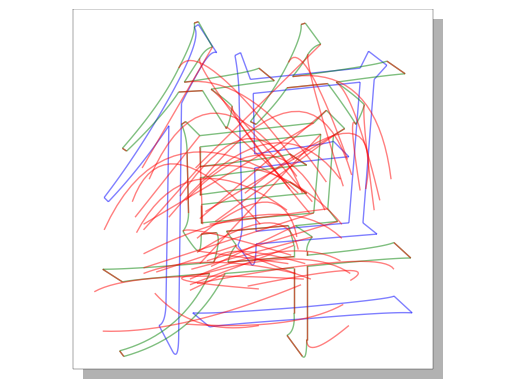

In [427]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale(f"1mm")
with vsk.pushMatrix():
    vsk.scale(100 / face.units_per_EM)
    draw_median_decomp(face, vsk, "但", "算")
vsk.display()
vsk.save("blendedChar_但_算_.svg")

## one char to pline


In [365]:
# one char to plines

def to_polylines(face, ch, resample_lines=False, samples_per=20):

    cp = []
    plines = []
    
    # if there are any segments in the current polyline,
    # add to the list of polylines and start a new polyline
    def move_to(dest, ctx):
        nonlocal cp
        if len(cp) > 0:
            plines.append(cp)
        cp = [[dest.x, -dest.y]]
        
    # append destination to the current polyline
    def line_to(dest, ctx):
        # resample lines so we have more points to play with
        if resample_lines:
            resampled = (Polyline([cp[-1], [dest.x, -dest.y]])
                         .resample(samples_per)
                         .vertices
                         .tolist())
            cp.extend(resampled[1:])
        else:
            cp.append([dest.x, -dest.y])
    
    # extend polyline with points from sampled bezier
    def quad_bez(ctrl, dest, ctx):
        pline = QuadraticBezier(cp[-1],
                                [ctrl.x, -ctrl.y],
                                [dest.x, -dest.y]).to_polyline(samples_per)
        cp.extend(pline[1:])
        
    # extend polyline with points from sampled bezier
    def cubic_bez(ctrl1, ctrl2, dest, ctx):
        pline = CubicBezier(cp[-1],
                            [ctrl1.x, -ctrl1.y],
                            [ctrl2.x, -ctrl2.y],
                            [dest.x, -dest.y]).to_polyline(20)
        cp.extend(pline[1:])
        
    face.load_char(ch, freetype.FT_LOAD_DEFAULT | freetype.FT_LOAD_NO_BITMAP)
    face.glyph.outline.decompose(None,
                                 move_to=move_to,
                                 line_to=line_to,
                                 conic_to=quad_bez,
                                 cubic_to=cubic_bez)
    
    # append whatever's leftover as a new polyline
    if len(cp) > 0:
        plines.append(cp)
        
    return plines

## a line of char to pline

In [366]:
from itertools import chain
def combine_plines(f, s, resample_lines=False):
    text_plines = []
    cx = 0
    for ch in s:
        glyph_pline = to_polylines(f, ch, resample_lines=resample_lines)
        translated = [Polyline(p).translate(cx, 0).vertices for p in glyph_pline]
        text_plines.extend(translated)
        cx += char2adv[ch]
    return text_plines

In [367]:


def intoOneList(char1, char2):
    if len(char1) > 1:
        ch1 = combine_plines(face, char1)
    else:
        ch1 = to_polylines(face, char1)
        
    if len(char2) > 1:
        ch2 = combine_plines(face, char2)
    else:
        ch2 = to_polylines(face, char2)

    pts1 = []
    pts2 = []
    newpts = []
    for pline1 in ch1:
        for point1 in pline1:
            pts1.append(point1)
            
    for pline2 in ch2:
        for point2 in pline2:
            pts2.append(point2)
            
    # let the char with less pline be the base counter:
    
    if len(pts1) < len(pts2):
        for pt1 in range(len(pts1)):
            newpt = []
            newx = round((pts1[pt1][0]+pts2[pt1][0])/2) #x
            newy = round((pts1[pt1][1]+pts2[pt1][1])/2) #y
            pt = [newx, newy]
            if pt not in newpts:
                newpts.append([newx, newy])
        print(len(newpts))
    
    if len(pts1) > len(pts2):
        for pt2 in range(len(pts2)):
            newpt = []
            newx = round((pts1[pt2][0]+pts2[pt2][0])/2) #x
            newy = round((pts1[pt2][1]+pts2[pt2][1])/2) #y
            pt = [newx, newy]
            if pt not in newpts:
                newpts.append([newx, newy])

        print(len(newpts))
    
    return newpts
    
    
# intoOneList('你','我') # test test



2261


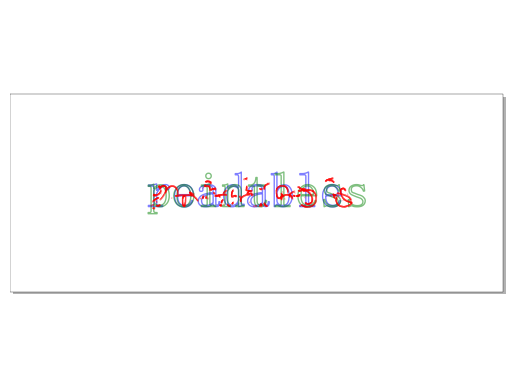

In [394]:

vsk = vsketch.Vsketch()
vsk.size("500mm", "200mm")
vsk.scale(f"0.5mm")

for pline in combine_plines(face,'readable'):
    vsk.stroke(1)
    with vsk.pushMatrix():
        vsk.scale(100 / face.units_per_EM)
        vsk.polygon(pline)
for pline in combine_plines(face,'pointless'):
    vsk.stroke(2)
    with vsk.pushMatrix():
        vsk.scale(100 / face.units_per_EM)
        vsk.polygon(pline)
        
for pt in intoOneList('readable', 'pointless'):
    vsk.stroke(3)
    with vsk.pushMatrix():
        vsk.scale(100 / face.units_per_EM)
        vsk.point(pt[0], pt[1])
        
        
vsk.save('readability_pt.svg')       
vsk.display()